In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex
import evaluate

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Graph

# Wrangle

In [2]:
# w.new_zillow_data()

In [3]:
# df = w.get_zillow_data(cached=True) 

In [16]:
df.shape

(38582, 62)

In [15]:
df.isnull().sum()

parcelid                            0
id                                  0
airconditioningtypeid           26358
architecturalstyletypeid        38481
basementsqft                    38555
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             38582
buildingqualitytypeid           14876
calculatedbathnbr                 144
decktypeid                      38251
finishedfloor1squarefeet        35244
calculatedfinishedsquarefeet      108
finishedsquarefeet12              194
finishedsquarefeet13            38580
finishedsquarefeet15            38578
finishedsquarefeet50            35244
finishedsquarefeet6             38502
fips                                0
fireplacecnt                    33929
fullbathcnt                       144
garagecarcnt                    24689
garagetotalsqft                 24689
hashottuborspa                  37693
heatingorsystemtypeid           13969
latitude                            0
longitude   

In [14]:
# df.regionidzip.min(), df.regionidzip.max()

In [6]:
# # there are a lot of nulls in this dataset, 
# thresh = df.shape[0] - (df.shape[0] * .15)

In [7]:
# df.shape[0]-thresh

In [8]:
# df = df.dropna(axis=1,thresh=thresh)

In [9]:
# df.isnull().sum()

In [10]:
# df.drop(columns=['calculatedbathnbr','calculatedfinishedsquarefeet','fullbathcnt','finishedsquarefeet12','lotsizesquarefeet'], inplace=True)

In [11]:
# region_df = df[['regionidzip','regionidcity','regionidcounty','fips']]

In [12]:
# df.assessmentyear.value_counts()

In [13]:
# features = ['parcelid','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','fips','latitude','longitude','yearbuilt','taxvaluedollarcnt','transactiondate','taxamount']

In [14]:
# df = df[features]

In [15]:
# df.set_index('parcelid', inplace=True)

In [16]:
# list(df.columns)

In [17]:
# df.columns = ['bathrooms',
#              'bedrooms',
#              'square_feet',
#              'fips',
#              'latitude',
#              'longitude',
#              'year_built',
#              'tax_value',
#              'transaction_date',
#              'tax_amount']

In [18]:
# df.info()

In [19]:
# df.isnull().sum()

In [20]:
# df = df.dropna()

In [21]:
# df.info()

In [22]:
# df.fips = df.fips.astype(int)

In [23]:
# df.year_built = df.year_built.astype(int)

In [24]:
# df['age_of_home'] = (2021 - df.year_built)

In [25]:
# df.info()

In [26]:
# df = ex.remove_outliers(df, 'square_feet', multiplier=1.5)

In [27]:
# df = ex.remove_outliers(df, 'tax_value', multiplier=1.5)

In [28]:
# df.info()

In [29]:
df = w.wrangle_zillow()

In [30]:
# df = df.drop(columns=['year_built'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36592 entries, 14634203 to 10713993
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       36592 non-null  float64
 1   bedrooms        36592 non-null  float64
 2   square_feet     36592 non-null  float64
 3   latitude        36592 non-null  float64
 4   longitude       36592 non-null  float64
 5   year_built      36592 non-null  int64  
 6   tax_value       36592 non-null  float64
 7   age_of_home     36592 non-null  int64  
 8   beds_and_baths  36592 non-null  float64
 9   beds_per_sqft   36592 non-null  float64
 10  baths_per_sqft  36592 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 3.4 MB


In [32]:
df.head()

,bathrooms,bedrooms,square_feet,latitude,longitude,year_built,tax_value,age_of_home,beds_and_baths,beds_per_sqft,baths_per_sqft
parcelid,,,,,,,,,,,
14634203,2.0,3.0,1125.0,33922098.0,-117954970.0,1974,289445.0,47,5.0,0.002667,0.001778
11721753,2.0,3.0,1316.0,34033180.0,-118355396.0,1923,205123.0,98,5.0,0.002280,0.001520
11289917,2.0,3.0,1458.0,34686163.0,-118113100.0,1970,136104.0,51,5.0,0.002058,0.001372
11637029,2.0,3.0,1766.0,34073222.0,-118390965.0,1980,810694.0,41,5.0,0.001699,0.001133
11705026,1.0,2.0,1421.0,33999877.0,-118291863.0,1911,35606.0,110,3.0,0.001407,0.000704


# Tax Rate distribution

In [33]:
tax_df = w.tax_rate_distribution()

In [34]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34794 entries, 14634203 to 10713993
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fips        34794 non-null  float64
 1   tax_value   34794 non-null  float64
 2   tax_amount  34794 non-null  float64
 3   tax_rate    34794 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB


In [35]:
tax_df.head(2)

,fips,tax_value,tax_amount,tax_rate
parcelid,,,,
14634203,6059.0,289445.0,3490.16,0.012058
11721753,6037.0,205123.0,2627.48,0.012809


In [36]:
tax_df.groupby('fips').mean()

,tax_value,tax_amount,tax_rate
fips,,,
6037.0,401571.597653,5013.558581,0.012939
6059.0,471250.218178,5471.980614,0.011878
6111.0,438003.144855,4979.441996,0.011473


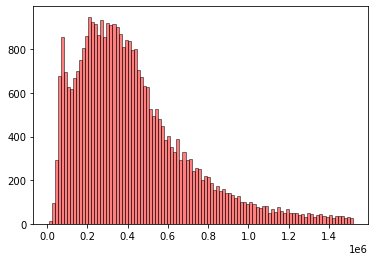

In [37]:
plt.hist(data=tax_df, x='tax_value', bins=100, color='red', alpha=.5, ec='black', label='Tax Value Distribution of 3 Southern Californian Counties')

plt.show()

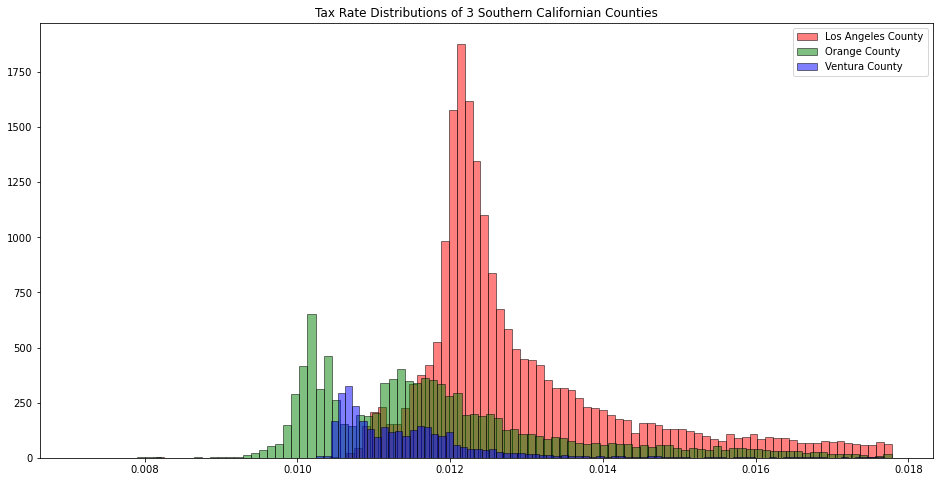

In [38]:
plt.figure(figsize=(16,8))

plt.hist(data=tax_df[tax_df.fips == 6037], x='tax_rate', bins=100, color='red', alpha=.5, ec='black', label='Los Angeles County')
plt.hist(data=tax_df[tax_df.fips == 6059], x='tax_rate',  bins=100, color='green', alpha=.5, ec='black', label='Orange County')
plt.hist(data=tax_df[tax_df.fips == 6111], x='tax_rate', bins=100, color="blue", alpha=.5, ec='black', label='Ventura County')

plt.title('Tax Rate Distributions of 3 Southern Californian Counties')
plt.legend()
plt.show()

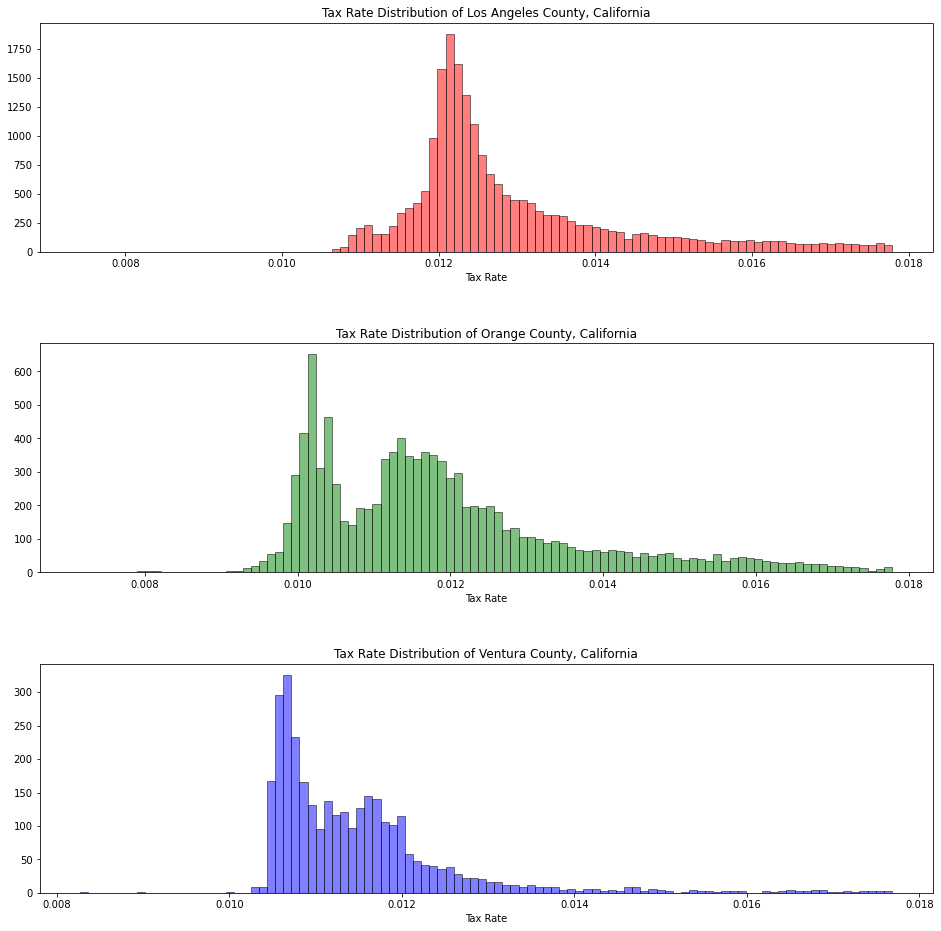

In [39]:
plt.figure(figsize=(16,16))

plt.subplot(3, 1, 1, xlabel='Tax Rate', title='Tax Rate Distribution of Los Angeles County, California')
plt.hist(data=tax_df[tax_df.fips == 6037], x='tax_rate', bins=100, color='red', alpha=.5, ec='black')

plt.subplot(3, 1, 2, xlabel='Tax Rate', title='Tax Rate Distribution of Orange County, California')
plt.hist(data=tax_df[tax_df.fips == 6059], x='tax_rate',  bins=100, color='green', alpha=.5, ec='black')

plt.subplot(3, 1, 3, xlabel='Tax Rate', title='Tax Rate Distribution of Ventura County, California')
plt.hist(data=tax_df[tax_df.fips == 6111], x='tax_rate', bins=100, color="blue", alpha=.5, ec='black')

plt.subplots_adjust(hspace=.4)
plt.show()


# Exploration

In [40]:
target = 'tax_value'

In [41]:
w.select_kbest(df, target, 5)

['bathrooms', 'bedrooms', 'square_feet', 'beds_and_baths', 'beds_per_sqft']

In [42]:
w.rfe(df,target,5)

['bathrooms', 'bedrooms', 'year_built', 'age_of_home', 'beds_and_baths']

In [43]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.train_validate_test_split(df, target, 42)

In [44]:
train.shape, validate.shape, test.shape

((20491, 11), (8782, 11), (7319, 11))

In [45]:
# sns.pairplot(data=train, hue='tax_value')

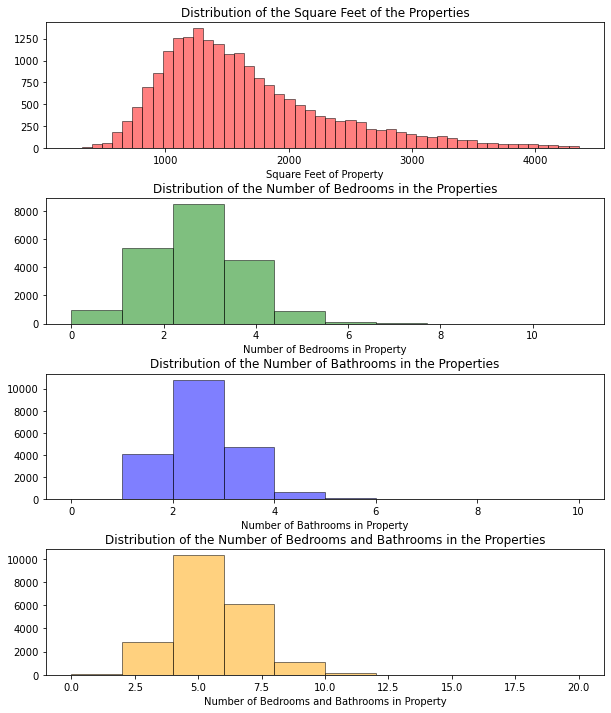

In [46]:
plt.figure(figsize=(10,12))

plt.subplot(4, 1, 1, xlabel='Square Feet of Property', title='Distribution of the Square Feet of the Properties')
plt.hist(data=train, x='square_feet', bins=50, color='red', alpha=.5, ec='black')

plt.subplot(4, 1, 2, xlabel='Number of Bedrooms in Property', title='Distribution of the Number of Bedrooms in the Properties')
plt.hist(data=train, x='bedrooms', color='green', alpha=.5, ec='black')

plt.subplot(4, 1, 3, xlabel='Number of Bathrooms in Property', title='Distribution of the Number of Bathrooms in the Properties')
plt.hist(data=train, x='bathrooms', color='blue', alpha=.5, ec='black')

plt.subplot(4, 1, 4, xlabel='Number of Bedrooms and Bathrooms in Property', title='Distribution of the Number of Bedrooms and Bathrooms in the Properties')
plt.hist(data=train, x='beds_and_baths', color='orange', alpha=.5, ec='black')


plt.subplots_adjust(hspace=.4)

plt.show()


In [47]:
# plt.figure(figsize=(20,8))

# plt.hist(x=train.price_per_sqft, bins=100, ec='black')

# plt.show()

# Scale the data

In [48]:
object_cols = w.get_object_cols(train)

In [49]:
numeric_cols = w.get_numeric_X_cols(X_train, object_cols)

In [50]:
X_train_scaled, X_validate_scaled, X_test_scaled = w.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [51]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((20491, 10), (8782, 10), (7319, 10))

# Statisical Tests

### Overview of Statistical Tests

- Correlation tests are used to check if two samples are related. They are often used for feature selection and multivariate analysis in data preprocessing and exploration.

- A T-test lets us compare a categorical and a continuous variable by comparing the mean of the continuous variable by subgroups based on the categorical variable

All statistical testing will be run using a 95% confidence level, making the alpha value 5% or 0.05. If the p-value is less than the alpha value we can reject the null hypothesis (H<sub>0</sub>) and move forward with the alternate hypothesis (H<sub>1</sub>).


### Hypotheses

For all Correlation tests below: 

- The H<sub>0</sub> is that there is no correlation between the two samples.

- The H<sub>1</sub> is that there is a correlation between the two samples.

For the T-test:

- The H<sub>0</sub> is that there is no difference in the means of the LA County Tax rates.
- The H<sub>1</sub> is that the LA County Tax Rate is a different mean than the entire population.

Because of the T-test hypothesis, I will be conducting a 1 sample T-test.

In [52]:
r, p = stats.pearsonr(X_train_scaled.bathrooms, y_train)
round(r,4), round(p, 4)

(0.4431, 0.0)

In [53]:
r, p = stats.pearsonr(X_train_scaled.bedrooms, y_train)
round(r,4), round(p, 4)

(0.259, 0.0)

In [54]:
r, p = stats.pearsonr(X_train_scaled.square_feet, y_train)
round(r,4), round(p, 4)

(0.5296, 0.0)

In [55]:
r, p = stats.pearsonr(X_train_scaled.beds_and_baths, y_train)
round(r,4), round(p, 4)

(0.3871, 0.0)

In [56]:
r, p = stats.pearsonr(X_train_scaled.bathrooms, X_train_scaled.square_feet)
round(r,4), round(p, 4)

(0.7489, 0.0)

In [57]:
la_county = tax_df[tax_df.fips == 6037]

In [58]:
t, p = stats.ttest_1samp(la_county.tax_rate, tax_df.tax_rate.mean())
round(t,4), round(p, 4)

(46.5759, 0.0)

### Results of Statistical Testing

Correlation results between the following features:
- bathrooms and tax value: t-statistic = 0.3998, p-value = 0.0
- bedrooms and tax value: t-statistic = 0.2363, p-value = 0.0
- square feet and tax value: t-statistic = 0.4752, p-value = 0.0
- total number of bedrooms and bathrooms and tax value: t-statistic = 0.3497, p-value = 0.0
- bathrooms and square feet: t-statistic = 0.7379, p-value = 0.0

All correlation tests reject the H<sub>0</sub> and can move forward with the corresponding H<sub>1</sub>.


One Sample T-test results are as follows:

- The t-statistic = 57.0874, and the p-value = 0.0.

There is enough evidence to reject the H<sub>0</sub> and move forward with the H<sub>1</sub> indicating that the LA country tax rate mean is significantly different from the tax rate of all 3 counties.

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20491 entries, 12545738 to 11235438
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       20491 non-null  float64
 1   bedrooms        20491 non-null  float64
 2   square_feet     20491 non-null  float64
 3   latitude        20491 non-null  float64
 4   longitude       20491 non-null  float64
 5   year_built      20491 non-null  int64  
 6   tax_value       20491 non-null  float64
 7   age_of_home     20491 non-null  int64  
 8   beds_and_baths  20491 non-null  float64
 9   beds_per_sqft   20491 non-null  float64
 10  baths_per_sqft  20491 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.9 MB


# Modeling

## Baseline

In [60]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [61]:
value_pred_mean = y_train.tax_value.mean()
y_train['value_pred_mean'] = value_pred_mean
y_validate['value_pred_mean'] = value_pred_mean

value_pred_median = y_train.tax_value.median()
y_train['value_pred_median'] = value_pred_median
y_validate['value_pred_median'] = value_pred_median

In [62]:
# RMSE of value_pred_mean
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_mean) ** (1/2)

# Storing mean baseline values
rmse_train_baseline_mean = rmse_train
rmse_validate_baseline_mean = rmse_validate

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_median) ** (1/2)
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_median) ** (1/2)

# Storing median baseline values
rmse_train_baseline_median = rmse_train
rmse_validate_baseline_median = rmse_validate

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  271194.48 
Validate/Out-of-Sample:  272149.78
RMSE using Median
Train/In-Sample:  276269.48 
Validate/Out-of-Sample:  277446.89


### Baseline Model R<sup>2</sup> Value

In [63]:
r2_score_baseline = r2_score(y_validate.tax_value, y_validate.value_pred_mean)
r2_score_baseline

-2.145577268075627e-05

## Linear Regression (OLS)

In [64]:
lm = LinearRegression(normalize=True)


lm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['value_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm) ** (1/2)

# predict validate
y_validate['value_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", round(rmse_train, 4), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate, 4))

RMSE for OLS using LinearRegression
Training/In-Sample:  217503.9051 
Validation/Out-of-Sample:  220468.9564


### OLS Model R<sup>2</sup> Value

In [65]:
r2_score_ols = r2_score(y_validate.tax_value, y_validate.value_pred_lm)
round(r2_score_ols, 4)

0.3437

## TweedieRegressor (GLM)

In [66]:
# create the model object
glm = TweedieRegressor(power=0, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['value_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_glm) ** (1/2)

# predict validate
y_validate['value_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", round(rmse_train,4), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate, 4))

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  217516.6069 
Validation/Out-of-Sample:  220563.6468


### Tweedie Regressor Model R<sup>2</sup> Value

In [67]:
r2_score_glm = r2_score(y_validate.tax_value, y_validate.value_pred_glm)
round(r2_score_glm, 4)

0.3432

## LassoLars

In [68]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.tax_value)

# predict train
y_train['value_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lars) ** (1/2)

# predict validate
y_validate['value_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", round(rmse_train, 4), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,4))

RMSE for Lasso + Lars
Training/In-Sample:  217521.8752 
Validation/Out-of-Sample:  220536.3882


### Lasso Lars Model R<sup>2</sup> Value

In [69]:
r2_score_lars = r2_score(y_validate.tax_value, y_validate.value_pred_lars)
round(r2_score_lars,4)

0.3433

## Polynomial Regression

In [70]:
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

### LinearRegression

In [71]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.tax_value)

# predict train
y_train['value_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.tax_value, y_train.value_pred_lm2) ** (1/2)

# predict validate
y_validate['value_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.tax_value, y_validate.value_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", round(rmse_train,4), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,4))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  211227.5585 
Validation/Out-of-Sample:  214109.6968


### Polynomial Regession Model R<sup>2</sup> Value

In [72]:
r2_score_lm2 = r2_score(y_validate.tax_value, y_validate.value_pred_lm2)
round(r2_score_lm2, 4)

0.381

In [73]:
print(f'Poly Reg: {round(r2_score_lm2, 4)}')
print(f'LassoLar: {round(r2_score_lars,4)}')
print(f'Tweedie: {round(r2_score_glm, 4)}')
print(f'Linear: {round(r2_score_ols, 4)}')

Poly Reg: 0.381
LassoLar: 0.3433
Tweedie: 0.3432
Linear: 0.3437


## Polynomial Regression Model Test

In [74]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['value_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.tax_value, y_test.value_pred_lm2) ** (1/2)

print("RMSE for LassoLars Model\nOut-of-Sample Performance: ", round(rmse_test, 4))

RMSE for LassoLars Model
Out-of-Sample Performance:  213615.6212


In [75]:
print(f'Baseline Performance:\nRSME mean: {round(rmse_train_baseline_mean, 3)}\nRSME median: {round(rmse_train_baseline_median,3)}\n')


print("RMSE for Polynomial Regression Train and Validate Performance:\nTraining/In-Sample: ", round(rmse_train,3), 
      "\nValidation/Out-of-Sample: ", round(rmse_validate,3), '\n')

print("RMSE for Polynomial Regression Model Test Performance:\nOut-of-Sample Performance: ", rmse_test)
print(f'The Linear Regession model has an R_squared of {round(r2_score_lm2, 3)}')

Baseline Performance:
RSME mean: 271194.48
RSME median: 276269.481

RMSE for Polynomial Regression Train and Validate Performance:
Training/In-Sample:  211227.558 
Validation/Out-of-Sample:  214109.697 

RMSE for Polynomial Regression Model Test Performance:
Out-of-Sample Performance:  213615.6212365427
The Linear Regession model has an R_squared of 0.381


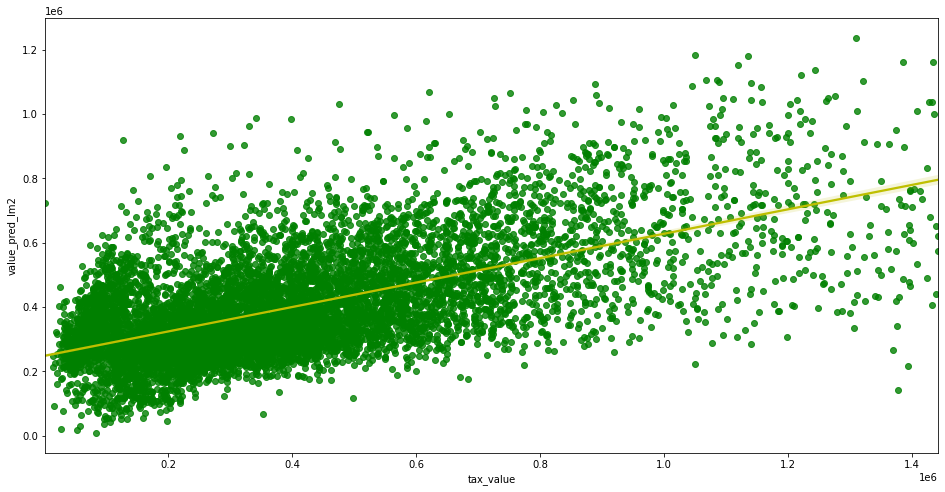

In [76]:
plt.figure(figsize=(16,8))

sns.regplot(data=y_test, x=y_validate.tax_value, y = y_validate.value_pred_lm2, 
            scatter_kws={'color':'green'}, line_kws={'color':'y'})

plt.show()

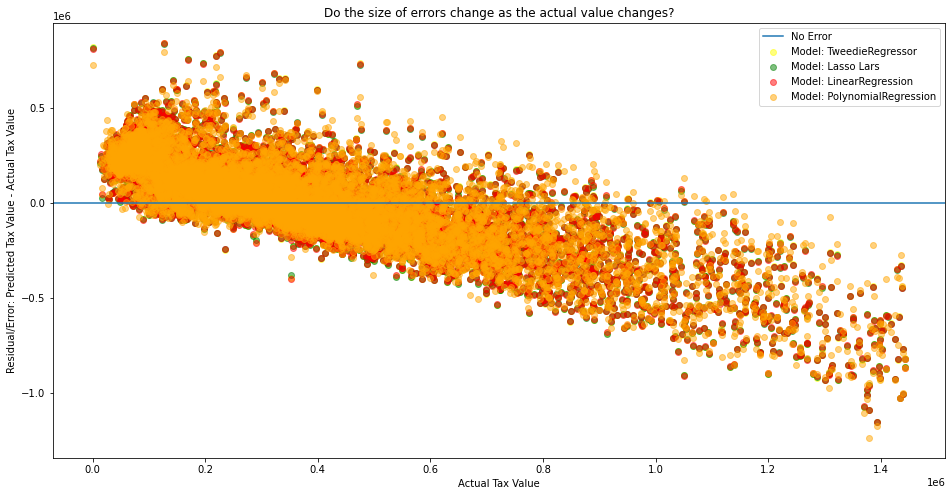

In [77]:
plt.figure(figsize=(16,8))

plt.axhline(label="No Error")
plt.scatter(y_validate.tax_value, y_validate.value_pred_glm - y_validate.tax_value, 
            alpha=.5, color="yellow", s=None, label="Model: TweedieRegressor")
plt.scatter(y_validate.tax_value, y_validate.value_pred_lars - y_validate.tax_value, 
            alpha=.5, color="green", s=None, label="Model: Lasso Lars")
plt.scatter(y_validate.tax_value, y_validate.value_pred_lm - y_validate.tax_value , 
            alpha=.5, color="red", s=None, label="Model: LinearRegression")
plt.scatter(y_validate.tax_value, y_validate.value_pred_lm2 - y_validate.tax_value , 
            alpha=.5, color="orange", s=None, label="Model: PolynomialRegression")
plt.legend()
plt.xlabel("Actual Tax Value")
plt.ylabel("Residual/Error: Predicted Tax Value - Actual Tax Value")
plt.title("Do the size of errors change as the actual value changes?")

plt.show()

<Figure size 1008x720 with 0 Axes>

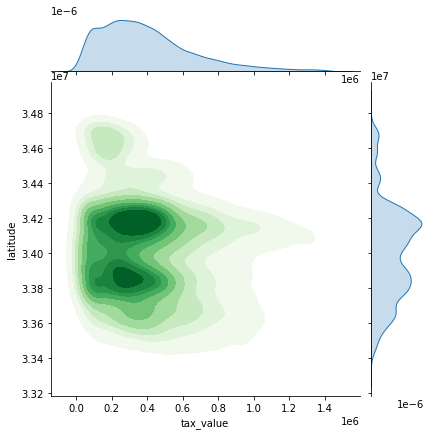

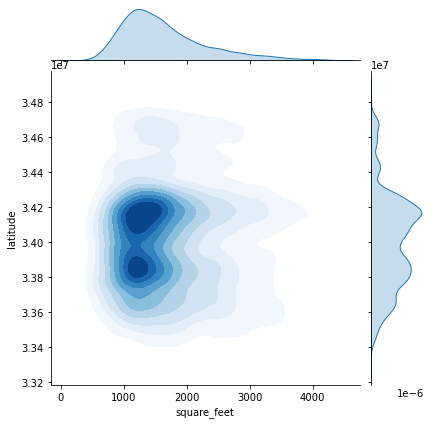

In [78]:
plt.figure(figsize=(14,10))


sns.jointplot(data = train, 
              x = 'tax_value', 
              y = 'latitude', 
              kind = 'kde', 
              cmap = 'Greens',
              fill = True)


plt.ylabel('South', loc='bottom')
plt.ylabel('Latitude', loc='center')
plt.ylabel('North', loc='top') 


plt.show()

sns.jointplot(data = train, 
              x = 'square_feet', 
              y = 'latitude', 
              kind = 'kde', 
              cmap = 'Blues',
              fill = True)

plt.show()

<Figure size 720x576 with 0 Axes>

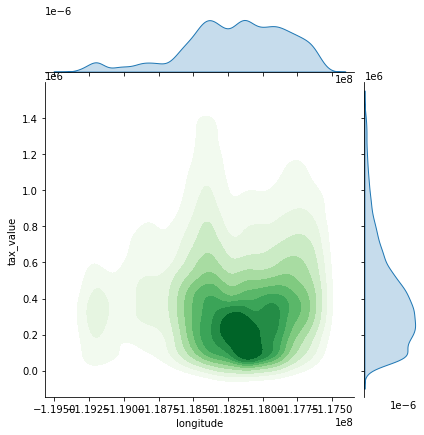

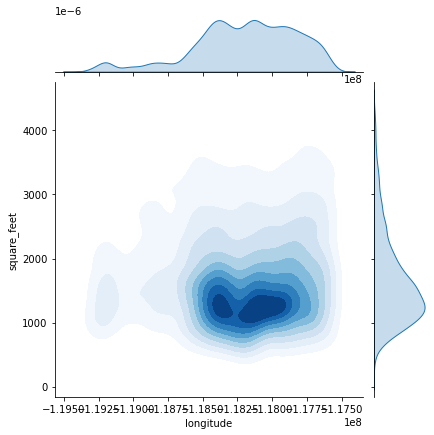

In [79]:
plt.figure(figsize=(10,8))


sns.jointplot(data = train, 
              x = 'longitude', 
              y = 'tax_value', 
              kind = 'kde', 
              cmap = 'Greens',
              fill = True)

plt.show()

sns.jointplot(data = train, 
              x = 'longitude', 
              y = 'square_feet', 
              kind = 'kde', 
              cmap = 'Blues',
              fill = True)

plt.show()